<a href="https://colab.research.google.com/github/Gowtham-1603/Spotify-EDA-Prediction-/blob/main/spotify_30000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [18]:
from google.colab import files


uploaded = files.upload()

Saving spotify_songs.csv to spotify_songs.csv


In [20]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['spotify_songs.csv']))

In [30]:
df.head(3)
df.shape
df.nunique()
df.describe()
df.isna().sum()
df.dropna(inplace=True)
df.shape
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.playlist_genre.value_counts()
fig=px.bar(df.playlist_genre.value_counts(),color=['red','blue','green','orange','teal','black'], text_auto=True)
fig.update_layout(width = 800)
fig.show()
fig=px.pie(df.playlist_genre.value_counts().values,df.playlist_genre.value_counts().index,color=['red','blue','green','orange','teal','black'])
fig.update_layout(width = 800)
fig.update_traces(textposition ='outside', textinfo = 'percent+label')
fig.show()
df.playlist_genre.value_counts()
fig=px.bar(df.playlist_genre.value_counts(),text_auto=True, orientation='h')
fig.update_layout(width = 700)
fig.update_traces(textposition ='inside' )
fig.show()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600,2019


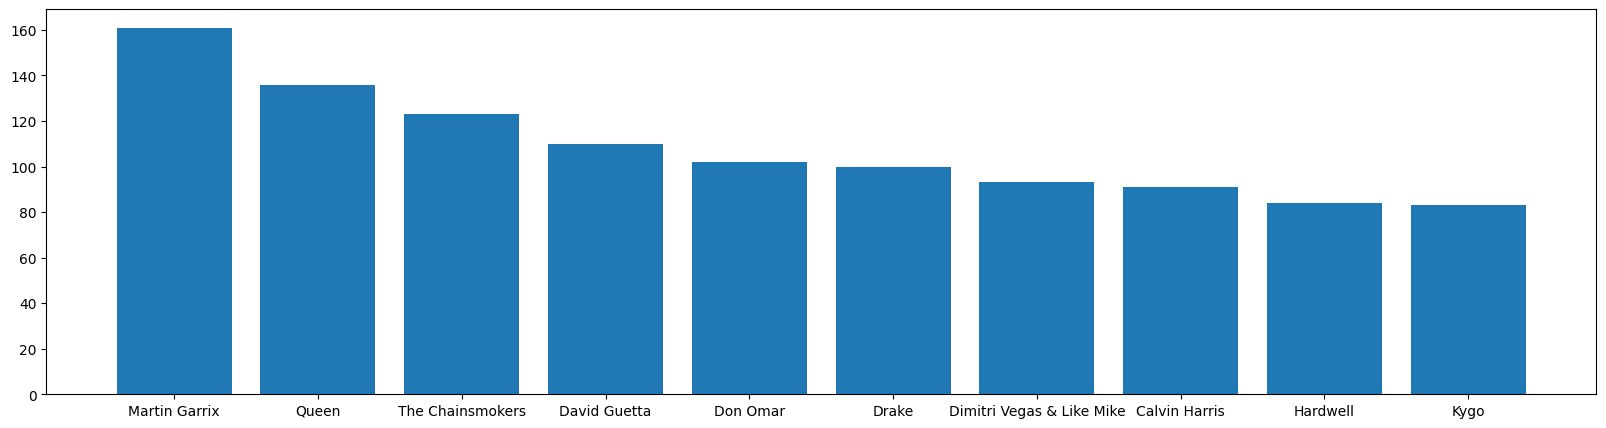

In [35]:
fig,ax=plt.subplots(figsize = (20,5))
plt.bar(df.track_artist.value_counts()[:10].index,df.track_artist.value_counts()[:10].values)
fig.show()
df.loc[:,['track_artist','track_popularity']].sort_values('track_popularity',ascending=False).drop_duplicates()[:10]
df.track_album_release_date
pd.DatetimeIndex(df.track_album_release_date).year
pd.DatetimeIndex(df.track_album_release_date).month
df['year'] =pd.DatetimeIndex(df.track_album_release_date).year
fig=px.bar(df['year'].value_counts()[:10],orientation='h')
fig.show()
df2 = df.copy()
df2.head(2)


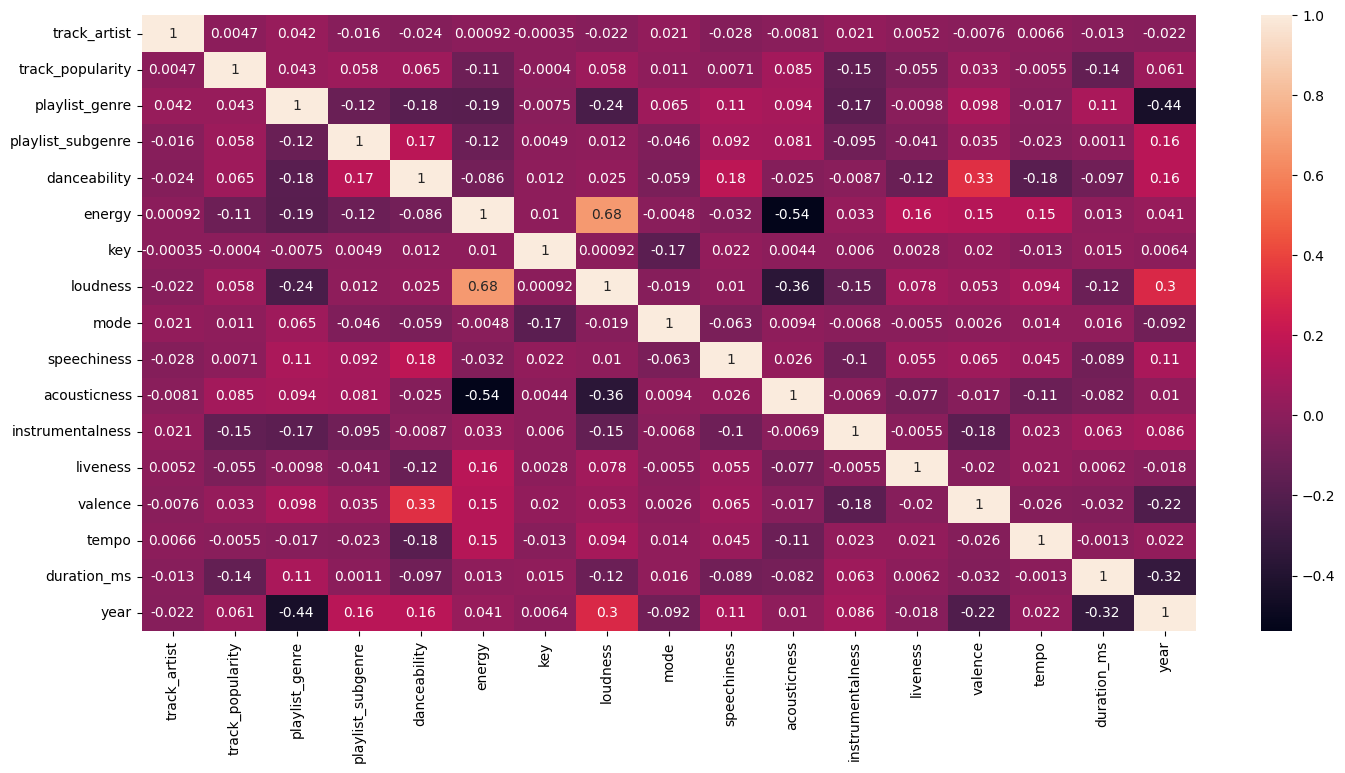

In [41]:
import sklearn
from sklearn. preprocessing import LabelEncoder
le= LabelEncoder()
df2.playlist_genre = le.fit_transform(df2.playlist_genre)
df2.playlist_subgenre = le.fit_transform(df2.playlist_subgenre)
df2.track_artist = le.fit_transform(df2.track_artist)
df2.playlist_genre
df2.describe()
fig,ax= plt.subplots(figsize = (17,8))
sns.heatmap(df2.corr(numeric_only=True),annot= True)
fig.show();
df_prep = df2.drop(['track_popularity','track_name','track_album_name','track_id','playlist_id','track_album_release_date','track_album_id','playlist_name',\
    'track_artist','loudness','playlist_subgenre','duration_ms','year','instrumentalness','mode','key'], axis=1)

In [53]:
df_prep.head()
df_prep.isna().any()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import tree
df_prep.columns
X= df_prep.drop(['valence'],axis=1)
y=df_prep.valence
num_cols= ['playlist_genre', 'danceability', 'energy',
        'speechiness', 'acousticness',  'liveness',
       'tempo']
pipe = Pipeline([
    ('scale',MinMaxScaler())
])
transform = ColumnTransformer([
    ('pipe',pipe,num_cols)
],
remainder='drop')
model_pipe = Pipeline([
    ('transform',transform),
    ('clf', RandomForestRegressor())
])
model_pipe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model_pipe.fit(X_train,y_train)
model_pipe.score(X_test,y_test)

0.4289319141500715